In [51]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from tabulate import tabulate

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# Step 1: Load data from CSV
data = pd.read_csv("dataset.csv")  # Update with your CSV file path
data

,Reviews,Sentiment
0,"Exhilarating and Nice , i can afford to buy th...",Positive
1,The overall affordability of products at pazha...,Positive
2,I feel but costlier ...but qualitywise the pri...,Positive
3,Overall Price range is in medium and I belive ...,Positive
4,As price depends on seasons and some other asp...,Negative
...,...,...
95,Your prices are too high for my liking; I pref...,Negative
96,Your prices are beyond what I can afford; I of...,Negative
97,Your prices are way beyond what I can afford; ...,Negative
98,"Your store offers great value for the prices, ...",Positive


In [53]:
reviews = data["Reviews"]
sentiments = data["Sentiment"]

In [54]:
# Encode sentiments to numerical values
label_encoder = LabelEncoder()
sentiments_encoded = label_encoder.fit_transform(sentiments)
sentiments_encoded

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [55]:
# Step 2: Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [56]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return " ".join(filtered_tokens)

reviews_preprocessed = reviews.apply(preprocess_text)

In [57]:
# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(reviews_preprocessed)
y = sentiments_encoded

In [58]:
#Word Count
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [59]:
data['word count'] = data['Reviews'].apply(no_of_words)

In [60]:
data

,Reviews,Sentiment,word count
0,"Exhilarating and Nice , i can afford to buy th...",Positive,183
1,The overall affordability of products at pazha...,Positive,174
2,I feel but costlier ...but qualitywise the pri...,Positive,112
3,Overall Price range is in medium and I belive ...,Positive,216
4,As price depends on seasons and some other asp...,Negative,140
...,...,...,...
95,Your prices are too high for my liking; I pref...,Negative,160
96,Your prices are beyond what I can afford; I of...,Negative,155
97,Your prices are way beyond what I can afford; ...,Negative,168
98,"Your store offers great value for the prices, ...",Positive,139


In [61]:
Store_review =  reviews_preprocessed
data['preprocessed_data']=Store_review
data.head(5)

,Reviews,Sentiment,word count,preprocessed_data
0,"Exhilarating and Nice , i can afford to buy th...",Positive,183,exhilarating nice afford buy shop really feel ...
1,The overall affordability of products at pazha...,Positive,174,overall affordability product pazhamudhir chol...
2,I feel but costlier ...but qualitywise the pri...,Positive,112,feel costlier qualitywise price reasonableit c...
3,Overall Price range is in medium and I belive ...,Positive,216,overall price range medium belive per standard...
4,As price depends on seasons and some other asp...,Negative,140,price depends season aspect affordability ca d...


In [62]:
Store_review = data['preprocessed_data'].tolist()

In [63]:
Store_review

['exhilarating nice afford buy shop really feel affordable cool discount often given juice free go owner shop never even staff help u owner like lightning fast money go blink entire state would tell shop highest quality comprises price actually prefer quality think loyal owner hired intern efficient remember name deepak kumar think new intern shop fine job taking care refund etc available shop even product america tell truth become poor buying shop good always buy actually care money completely satisfied service',
 'overall affordability product pazhamudhir cholai quite expensive assure proper quality thingshow influential perspective honest one seek discount issue ca find much difficulty sometimes issue gpay methodit fast good issue related payment checkout processi used compare 2 3 shop quality purpose irrespective price pmc satisfies lotthey make customer feel appreciated incentivize continue shopping return policy credit must given humble owner way handle issue absolutely brilliant

In [64]:
data.Sentiment.replace("Positive", 1, inplace=True)
data.Sentiment.replace("Negative", 0, inplace=True)

In [65]:
data

,Reviews,Sentiment,word count,preprocessed_data
0,"Exhilarating and Nice , i can afford to buy th...",1,183,exhilarating nice afford buy shop really feel ...
1,The overall affordability of products at pazha...,1,174,overall affordability product pazhamudhir chol...
2,I feel but costlier ...but qualitywise the pri...,1,112,feel costlier qualitywise price reasonableit c...
3,Overall Price range is in medium and I belive ...,1,216,overall price range medium belive per standard...
4,As price depends on seasons and some other asp...,0,140,price depends season aspect affordability ca d...
...,...,...,...,...
95,Your prices are too high for my liking; I pref...,0,160,price high liking prefer store get le discount...
96,Your prices are beyond what I can afford; I of...,0,155,price beyond afford often forego purchasing pr...
97,Your prices are way beyond what I can afford; ...,0,168,price way beyond afford avoid shopping promoti...
98,"Your store offers great value for the prices, ...",1,139,store offer great value price making promotion...


In [66]:
pos_reviews =  data[data.Sentiment == 1]
pos_reviews.head()

,Reviews,Sentiment,word count,preprocessed_data
0,"Exhilarating and Nice , i can afford to buy th...",1,183,exhilarating nice afford buy shop really feel ...
1,The overall affordability of products at pazha...,1,174,overall affordability product pazhamudhir chol...
2,I feel but costlier ...but qualitywise the pri...,1,112,feel costlier qualitywise price reasonableit c...
3,Overall Price range is in medium and I belive ...,1,216,overall price range medium belive per standard...
5,It's quite affordable compared to other simili...,1,109,quite affordable compared similiar shop discou...


In [67]:
neg_reviews =  data[data.Sentiment == 0]
neg_reviews.head()

,Reviews,Sentiment,word count,preprocessed_data
4,As price depends on seasons and some other asp...,0,140,price depends season aspect affordability ca d...
6,The product at your store are not easily affor...,0,134,product store easily affordable class promotio...
8,Okay the overall affordability of products are...,0,86,okay overall affordability product goodno disc...
17,"products are reasonably priced, but improvemen...",0,77,product reasonably priced improvement play sig...
21,"Prices strike me as fair, although I've notice...",0,125,price strike fair although noticed fluctuation...


<Figure size 600x600 with 0 Axes>

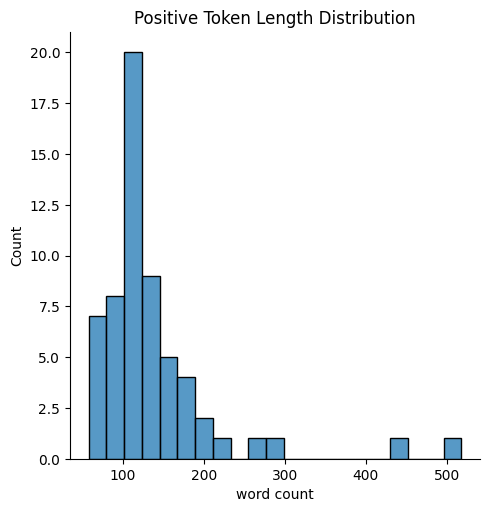

In [68]:
plt.figure(figsize=(6, 6))
sns.displot(pos_reviews, x='word count')
plt.title('Positive Token Length Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

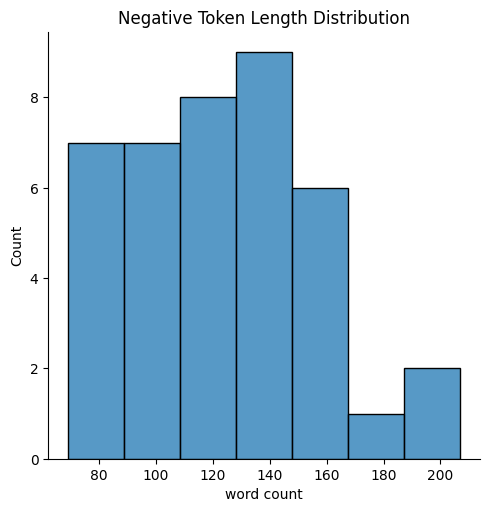

In [69]:
plt.figure(figsize=(6, 6))
sns.displot(neg_reviews, x='word count')
plt.title('Negative Token Length Distribution')
plt.show()

In [70]:
#Postive reviews most common words

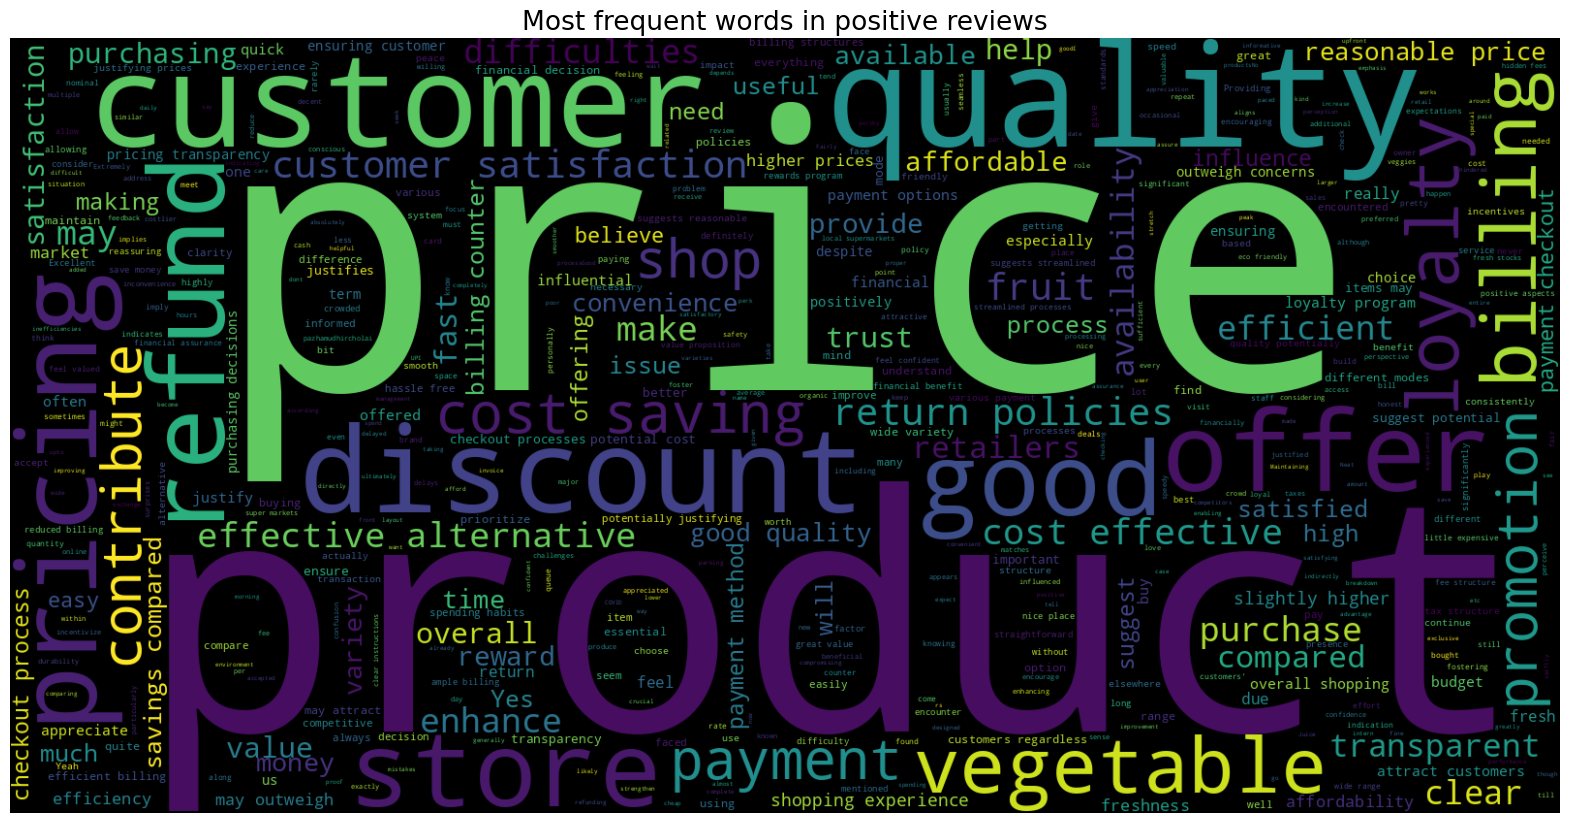

In [71]:
text = ' '.join([word for word in pos_reviews['Reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [72]:
from collections import Counter
count = Counter()
for text in pos_reviews['preprocessed_data'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('customer', 116),
 ('price', 111),
 ('quality', 107),
 ('product', 87),
 ('billing', 72),
 ('payment', 70),
 ('good', 60),
 ('may', 57),
 ('offer', 55),
 ('discount', 53),
 ('cost', 49),
 ('pricing', 44),
 ('policy', 43),
 ('saving', 43),
 ('store', 43)]

In [73]:
pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,customer,116
1,price,111
2,quality,107
3,product,87
4,billing,72


In [74]:
# Negative reviews most common words

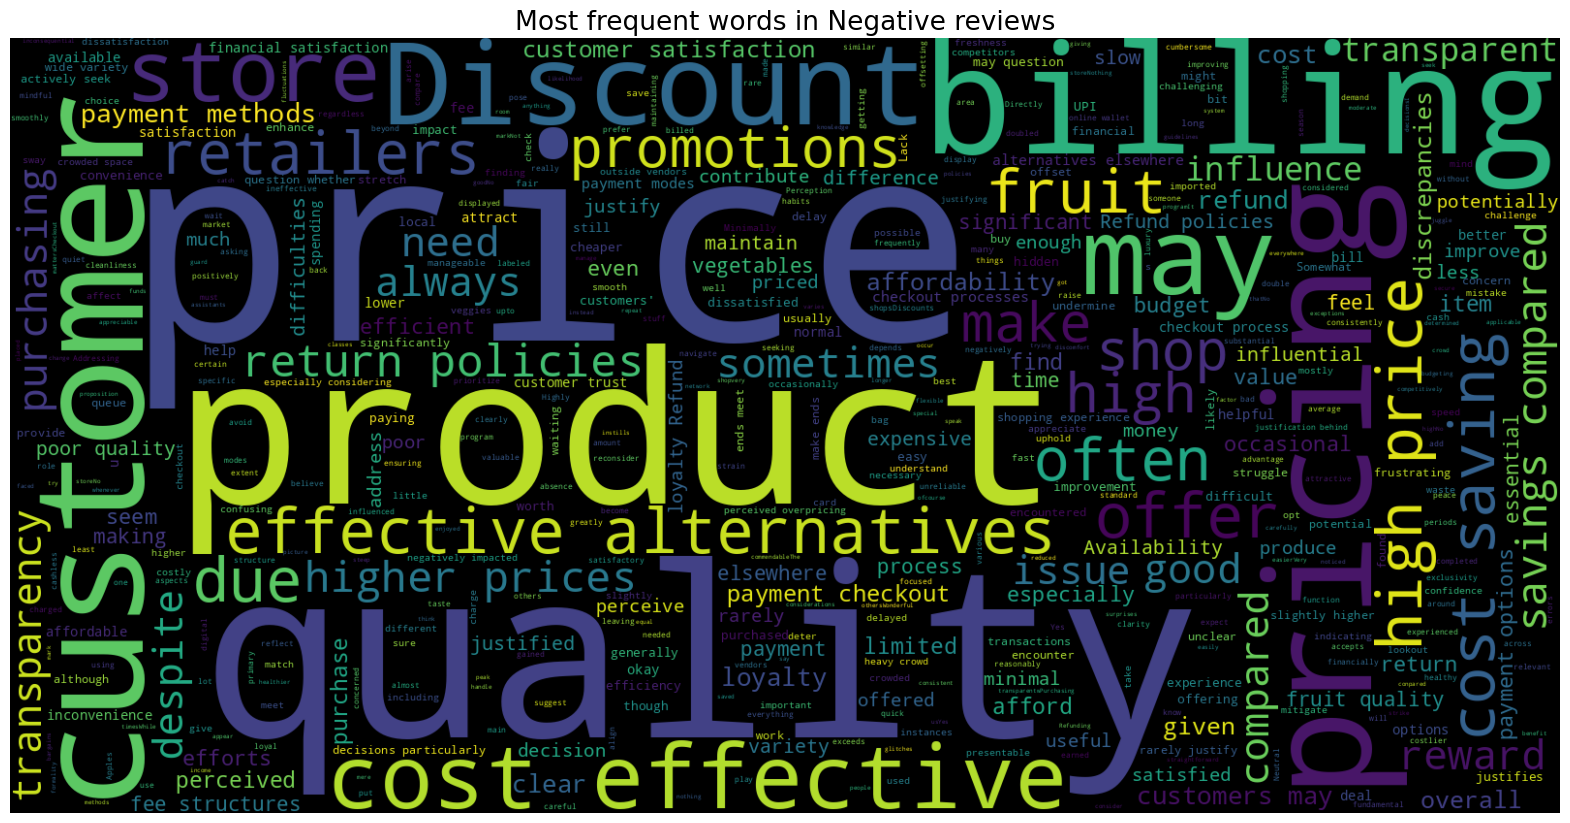

In [75]:
text = ' '.join([word for word in neg_reviews['Reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative reviews', fontsize = 19)
plt.show()

In [76]:
count = Counter()
for text in neg_reviews['preprocessed_data'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('price', 101),
 ('quality', 60),
 ('customer', 60),
 ('may', 49),
 ('payment', 42),
 ('cost', 42),
 ('high', 42),
 ('product', 34),
 ('billing', 33),
 ('saving', 31),
 ('compared', 31),
 ('fruit', 29),
 ('alternative', 29),
 ('policy', 28),
 ('due', 25)]

In [77]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,price,101
1,quality,60
2,customer,60
3,may,49
4,payment,42


In [78]:
# Longest Common Subsequence
def longest_common_subsequence(str1, str2):
    m, n = len(str1), len(str2)

    # Create a 2D table to store the lengths of LCS
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Build the dp table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Reconstruct the LCS
    i, j = m, n
    lcs = []
    while i > 0 and j > 0:
        if str1[i - 1] == str2[j - 1]:
            lcs.append(str1[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    # Reverse the list to get the correct order
    lcs.reverse()
    return ' '.join(lcs)

# Find LCS for all pairs of consecutive reviews
lcs_results = []
for i in range(len(data) - 1):
    review1 = data.loc[i, 'preprocessed_data']
    review2 = data.loc[i + 1, 'preprocessed_data']
    result = longest_common_subsequence(review1.split(), review2.split())
    lcs_results.append(result)

# Display the results
for i, result in enumerate(lcs_results):
    print(f"Pair {i + 1}: {result}")


Pair 1: discount fast shop quality price owner even good
Pair 2: product issue payment price quality
Pair 3: price payment payment price product product refund policy product billing fee structure
Pair 4: price payment process take time like quality price return product variety product price
Pair 5: payment payment process shop easy product transparent pricing
Pair 6: affordable promotion shop payment checkout process shop product offer reward return policy influence spending habit financial decision effective structure purchasing
Pair 7: product promotion faced process product justify price good
Pair 8: product discount promotion good price refund
Pair 9: affordability product discount payment speed efficiency price refund policy cost effective fee structure
Pair 10: product product discount price refund return policy cost alternative structure price
Pair 11: discount good product price offering quality
Pair 12: quality payment product quality good
Pair 13: quality payment compared be

In [79]:
# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

<80x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4225 stored elements in Compressed Sparse Row format>

In [80]:
# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
y_pred

array([0.59234124, 0.39080781, 0.91885843, 0.42498006, 0.26734297,
       0.51639941, 0.42645369, 0.71369279, 0.74912296, 0.72277   ,
       0.91318883, 0.61343691, 0.66294696, 0.72656705, 0.21204742,
       0.6783604 , 0.9809452 , 1.04278268, 0.60496002, 0.38338488])

In [82]:
# Since Linear Regression outputs continuous values, we need to threshold the predictions
# For simplicity, we use 0.5 as the threshold for binary classification
y_pred_class = np.round(y_pred).astype(int)

In [83]:
# Ensure predicted values are within the valid range of class labels
y_pred_class = np.clip(y_pred_class, 0, 1)

accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.75


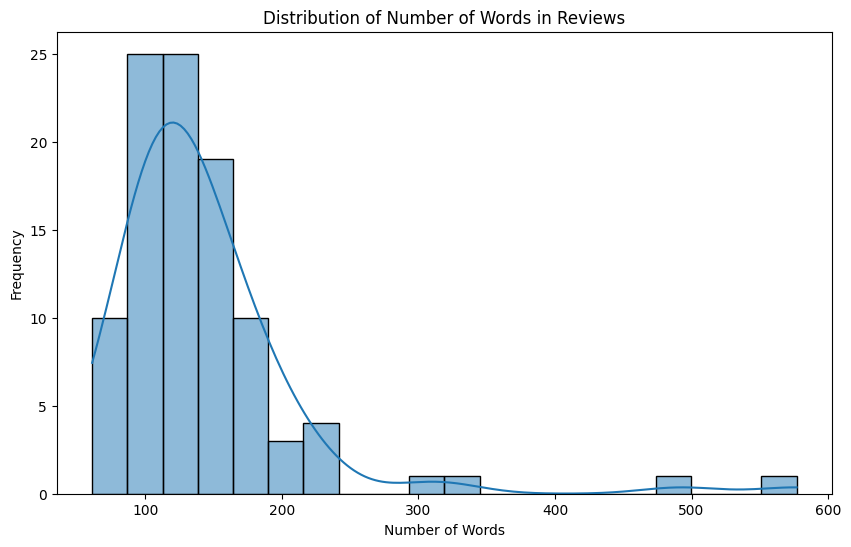

In [84]:
# Plot the number of words in each review
data['num_words'] = reviews.apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=20, kde=True)
plt.title('Distribution of Number of Words in Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

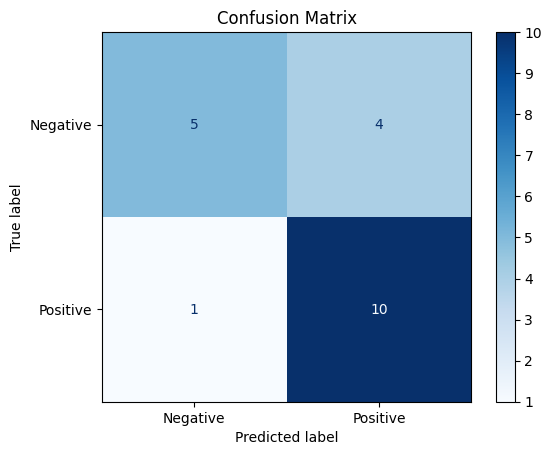

In [85]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

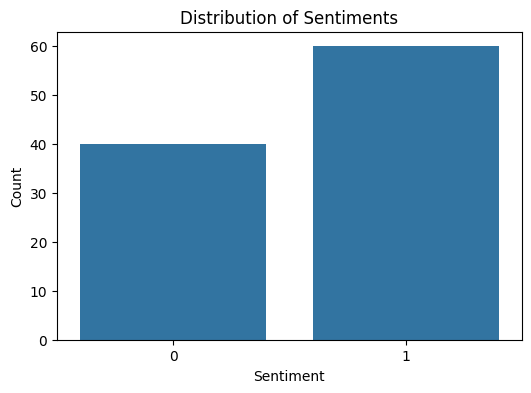

In [86]:
# Distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x=sentiments)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

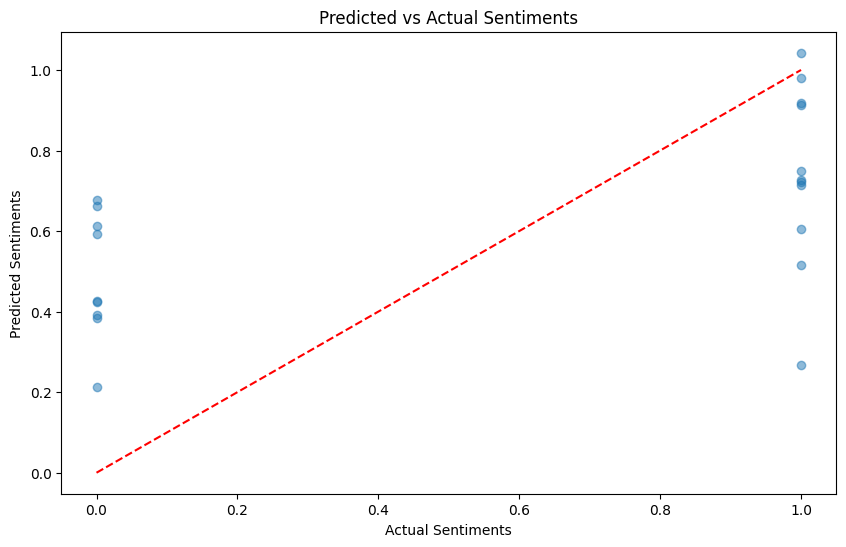

In [87]:
# Predicted vs Actual Sentiments
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Identity line
plt.title('Predicted vs Actual Sentiments')
plt.xlabel('Actual Sentiments')
plt.ylabel('Predicted Sentiments')
plt.show()

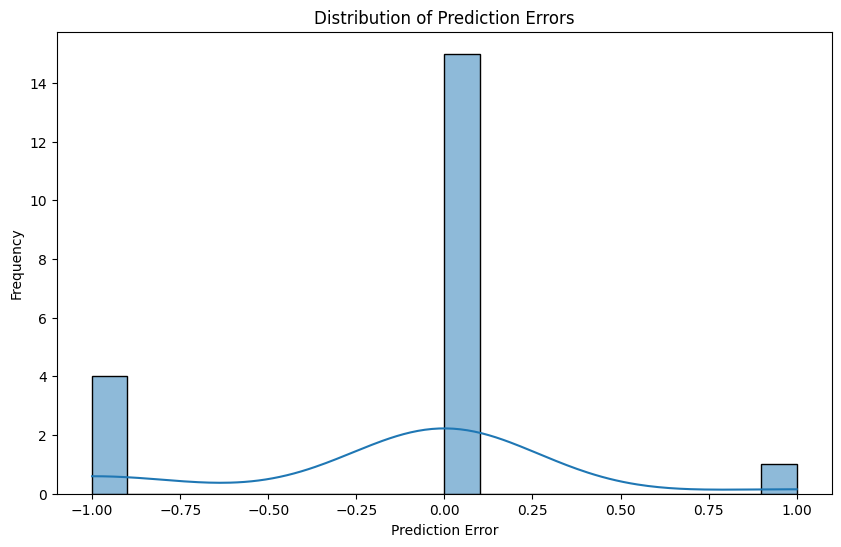

In [88]:
# Error distribution
errors = y_test - y_pred_class
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


In [89]:
y_pred_classes = np.round(y_pred).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)


# Prepare results for the table
results = [
    ["Linear Regression NLTK", accuracy, f1,mse]
    # Add other models' results here similarly
]

# Print results in table format
print(tabulate(results, headers=["Model", "Accuracy", "F1 Score", "Mean Squared Error"], floatfmt=".2f"))

Model                     Accuracy    F1 Score    Mean Squared Error
----------------------  ----------  ----------  --------------------
Linear Regression NLTK        0.75        0.80                  0.25


In [90]:
# Function to preprocess and predict sentiment for a new review
def predict_sentiment(review):
    review_preprocessed = preprocess_text(review)
    review_tfidf = tfidf_vectorizer.transform([review_preprocessed])
    sentiment_pred = model.predict(review_tfidf)
    sentiment_class = np.round(sentiment_pred).astype(int)
    sentiment_class = np.clip(sentiment_class, 0, 1)
    return label_encoder.inverse_transform(sentiment_class)[0]

# Get user input and predict sentiment
user_review = input("Enter a review: ")
predicted_sentiment = predict_sentiment(user_review)
print(f"The predicted sentiment for the review is: {predicted_sentiment}")

KeyboardInterrupt: Interrupted by user